### Basic Analogies
States: Shared memory the agent carries through the steps (like the user’s query, expert results, etc.)

Nodes: Each step in the process (e.g. call LLM, search DB)

Edges: The path from one step to the next

Entry point: Where the agent starts

END: Where the task finishes

It helps us to design and manage the flow of tasks in our application 
simply - StateGraph helps you build a smart flowchart for your AI agent

In [1]:
# Creating a basic HELLO Agent

        #############
        #   Start   #
        #############
              |
        #############
        #   Node    #
        #############
              |
        #############
        #    End    #
        #############

In [ ]:
!pip install langgraph

In [6]:
from typing import Dict,TypedDict
from langgraph.graph import StateGraph

In [7]:
class AgentState(TypedDict): #stateschema
    message : str

In [9]:
# need to pass in the input and output the updated state
# dock string in langraph are imp -> tells LLM what this functions are for
def greet_node(state : AgentState)->AgentState:
    """ Node to add a message """
    state['message'] = 'Hey ' +state['message']

    return state
    

## Build the graph

In [10]:
graph = StateGraph(AgentState)

#adding nodes 2 main params -> name of node and action it performs
graph.add_node("greeter",greet_node)

graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app = graph.compile()

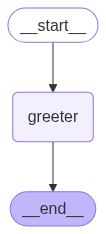

In [15]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
result = app.invoke({"message":"Parth"})

In [19]:
result['message']

'Hey Parth'

## Exercise 1 : Personalized Compliment Agent



1. Create State Schema
2. Create Node
3. Build the graph



In [28]:
class AgentState(TypedDict):
    compliment:str

In [36]:
def compliment(state: AgentState)->AgentState:
    state['compliment'] = "Hey " + state['compliment'] + " ! You are doing great"
    return state
    

In [37]:
graph = StateGraph(AgentState)

graph.add_node("complimenter",compliment)
graph.set_entry_point("complimenter")
graph.set_finish_point("complimenter")

app = graph.compile()

In [39]:
result = app.invoke({"compliment":"xyz"})
result

{'compliment': 'Hey xyz ! You are doing great'}